# MVP Comunidad Valenciana

<img src="../images/02.jpg" width="600"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from tools import dataoveriew, plot_roc_curve, plot_confusion_matrix
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None

# Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43


In [3]:
data.shape

(55227, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55227 entries, 0 to 55226
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha Alta         55227 non-null  datetime64[ns]
 1   Cliente            55227 non-null  int64         
 2   Modelo Caldera     55227 non-null  object        
 3   Provincia          55227 non-null  object        
 4   Gender             55227 non-null  object        
 5   Pais               55227 non-null  object        
 6   Born Date          55001 non-null  datetime64[ns]
 7   Tipo Propiedad     55227 non-null  object        
 8   Situacion Laboral  55227 non-null  object        
 9   Estado Civil       55227 non-null  object        
 10  Ingresos           55227 non-null  int64         
 11  Pagos Anuales      55227 non-null  int64         
 12  Fecha Estado       55227 non-null  datetime64[ns]
 13  Estado             55227 non-null  int64         
 14  Tipo I

In [5]:
data.isnull().sum()

Fecha Alta             0
Cliente                0
Modelo Caldera         0
Provincia              0
Gender                 0
Pais                   0
Born Date            226
Tipo Propiedad         0
Situacion Laboral      0
Estado Civil           0
Ingresos               0
Pagos Anuales          0
Fecha Estado           0
Estado                 0
Tipo Inmueble          0
Financiado             0
Precio Contado         0
Precio Total           0
Quejas                 0
Incidencias            0
Consumo Mes            0
dtype: int64

In [6]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 55227

Número de Columnas: 21

Columnas:

['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender', 'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral', 'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado', 'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total', 'Quejas', 'Incidencias', 'Consumo Mes']

Valores nulos: 226

Valores únicos:

Fecha Alta            2556
Cliente              55227
Modelo Caldera           2
Provincia                3
Gender                   2
Pais                     9
Born Date            19920
Tipo Propiedad           5
Situacion Laboral        6
Estado Civil             4
Ingresos               470
Pagos Anuales            5
Fecha Estado          2570
Estado                   2
Tipo Inmueble            7
Financiado               2
Precio Contado           6
Precio Total            11
Quejas                  21
Incidencias             18
Consumo Mes          31648
dtype: i

In [7]:
data['Cliente'] = data['Cliente'].astype('str')
data.describe()

,Ingresos,Pagos Anuales,Estado,Precio Total,Quejas,Incidencias,Consumo Mes
count,5.522700e+04,55227.000000,55227.000000,55227.000000,55227.000000,55227.000000,55227.000000
mean,3.987213e+04,12.904123,0.258750,500.564452,0.346642,1.016025,205.472291
std,5.108236e+06,1.062367,0.437952,111.664015,0.997261,2.258744,132.246441
min,1.000000e+00,12.000000,0.000000,199.000000,0.000000,0.000000,0.060000
25%,1.200000e+03,12.000000,0.000000,399.000000,0.000000,0.000000,104.730000
50%,1.500000e+03,12.000000,0.000000,499.000000,0.000000,0.000000,183.020000
75%,2.000000e+03,14.000000,1.000000,599.000000,0.000000,1.000000,279.970000
max,1.000000e+09,16.000000,1.000000,1199.000000,28.000000,17.000000,1146.380000


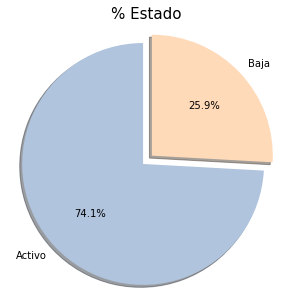

In [8]:
pesos = data.groupby(data['Estado'])['Estado'].count()
activos = pesos[0]/data['Estado'].count()*100
bajas = pesos[1]/data['Estado'].count()*100

labels = 'Activo', 'Baja'
sizes = [activos, bajas]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors =['lightsteelblue', 'peachpuff'])
ax1.axis('equal')
plt.title('% Estado', size = 15)

plt.show()

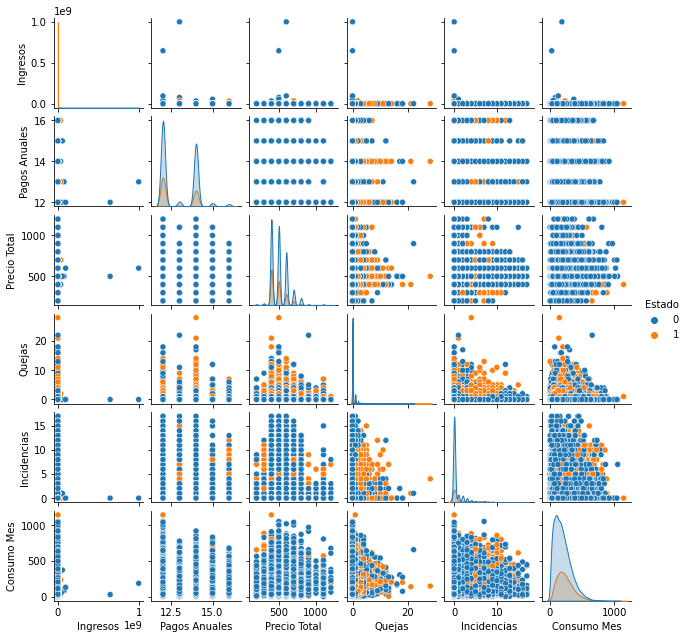

In [10]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Estado', height = 1.5);

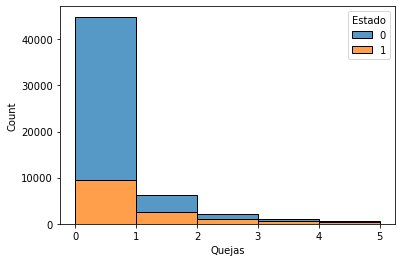

In [9]:
sns.histplot(data = data, x="Quejas", hue = 'Estado', multiple="stack",
             binwidth=1,  binrange = (0,5));

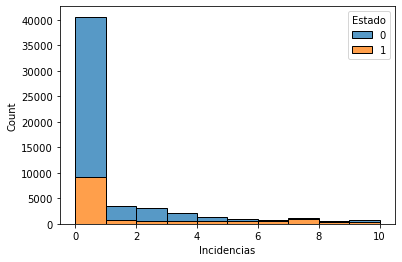

In [10]:
sns.histplot(data = data, x="Incidencias", hue = 'Estado', multiple="stack", binwidth=1, binrange = (0,10));

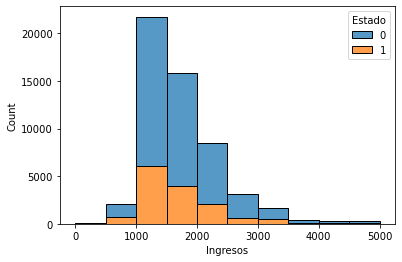

In [11]:
sns.histplot(data = data, x="Ingresos", hue = 'Estado', multiple="stack", binrange = (0,5000), bins = 10);

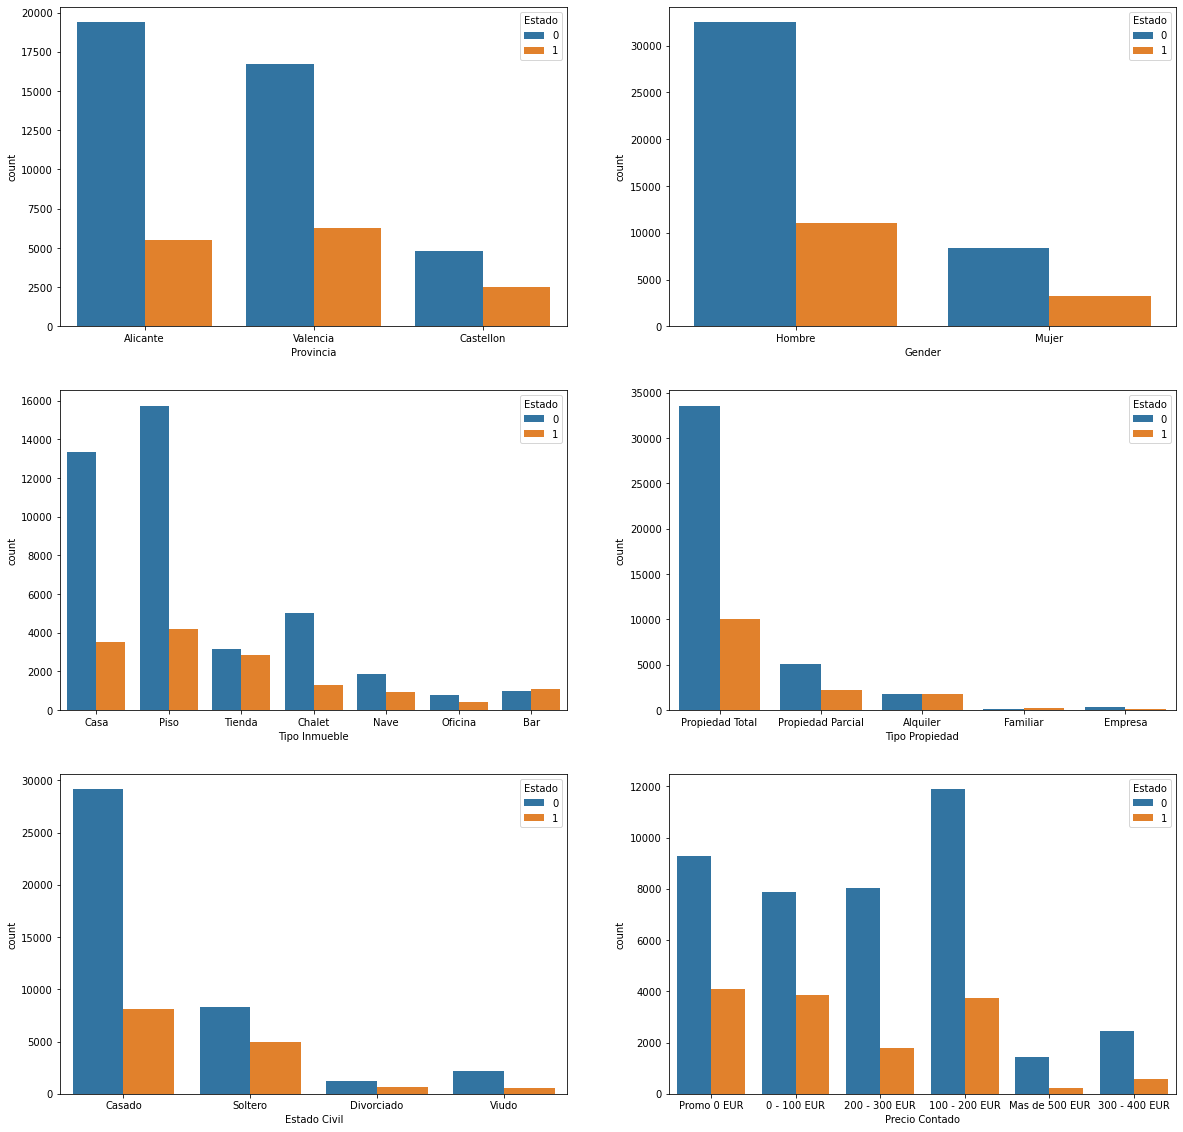

In [12]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.countplot(x='Provincia', hue = 'Estado',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Estado',data = data, ax=axarr[0][1])
sns.countplot(x='Tipo Inmueble', hue = 'Estado',data = data, ax=axarr[1][0])
sns.countplot(x='Tipo Propiedad', hue = 'Estado',data = data, ax=axarr[1][1])
sns.countplot(x='Estado Civil', hue = 'Estado',data = data, ax=axarr[2][0])
sns.countplot(x='Precio Contado', hue = 'Estado',data = data, ax=axarr[2][1])

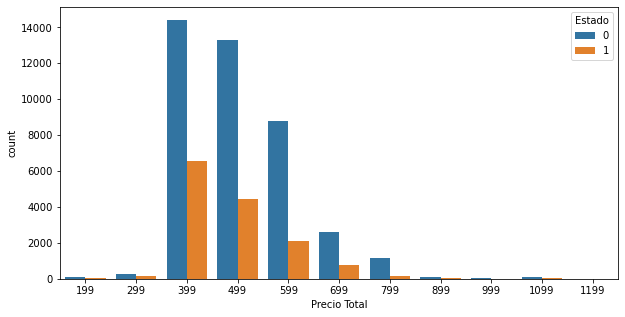

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(data = data, x="Precio Total", hue = 'Estado', ax = ax);

Estado
0    194.023762
1    238.269243
Name: Consumo Mes, dtype: float64


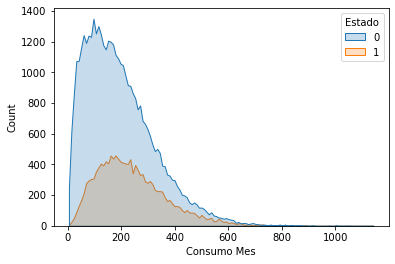

In [13]:
print(data.groupby(['Estado'])['Consumo Mes'].mean())
sns.histplot(data, x="Consumo Mes", hue="Estado", element="poly");

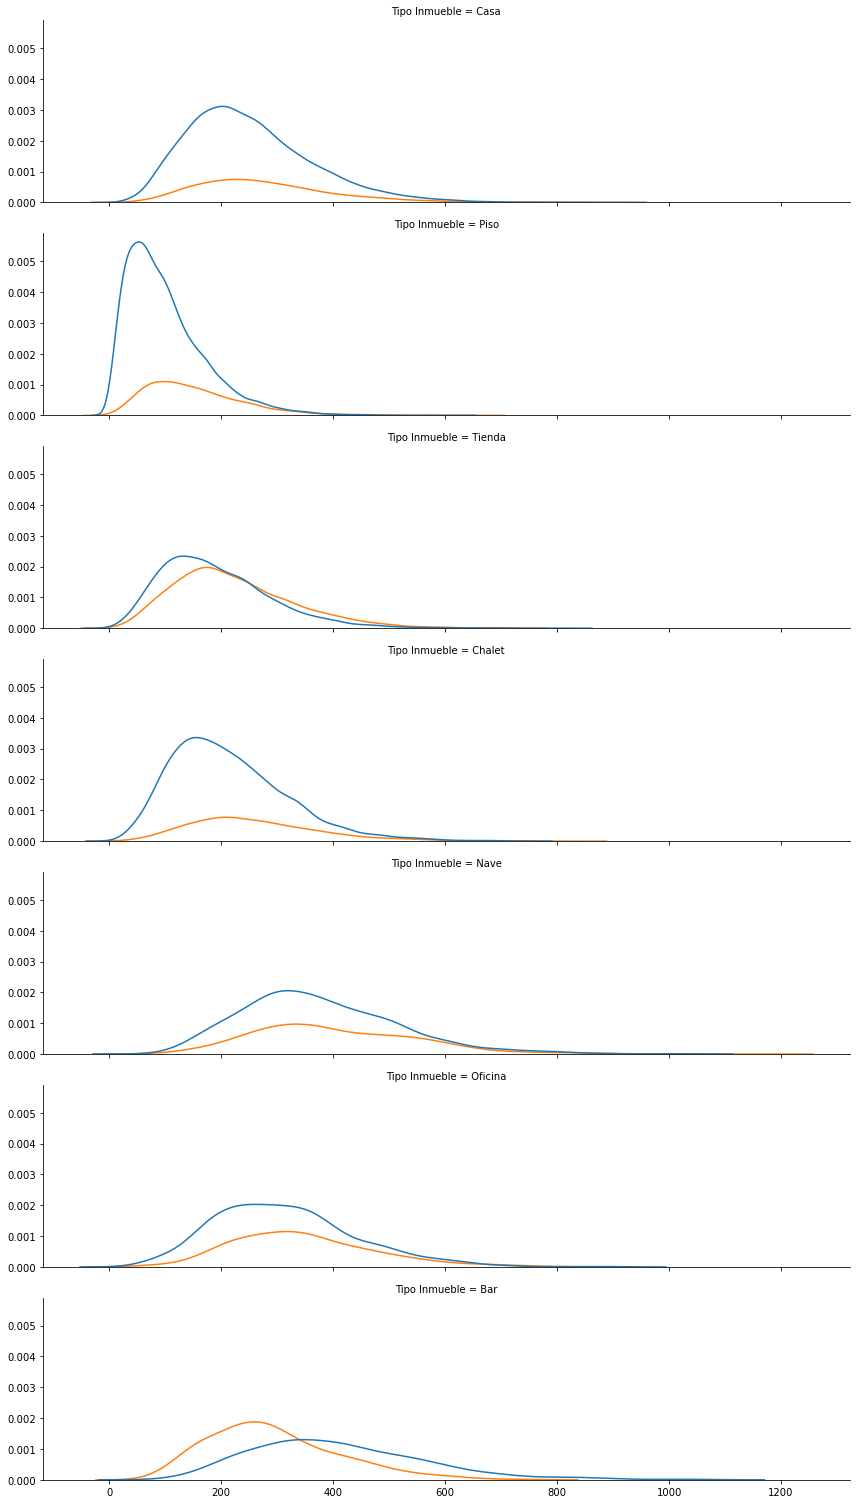

In [14]:
g = sns.FacetGrid(data, row="Tipo Inmueble", height=3, aspect=4)
g.map_dataframe(sns.kdeplot, x="Consumo Mes", hue = 'Estado')

In [22]:
corr = data.corr()
corr

,Ingresos,Pagos Anuales,Estado,Precio Total,Quejas,Incidencias,Consumo Mes
Ingresos,1.000000,-0.000861,-0.003719,0.003488,-0.002298,-0.002992,-0.004198
Pagos Anuales,-0.000861,1.000000,-0.066080,0.001921,-0.014417,-0.029083,-0.049924
Estado,-0.003719,-0.066080,1.000000,-0.106140,0.192184,0.213927,0.146525
Precio Total,0.003488,0.001921,-0.106140,1.000000,-0.051456,-0.013345,0.018499
Quejas,-0.002298,-0.014417,0.192184,-0.051456,1.000000,0.046529,0.045781
Incidencias,-0.002992,-0.029083,0.213927,-0.013345,0.046529,1.000000,0.056668
Consumo Mes,-0.004198,-0.049924,0.146525,0.018499,0.045781,0.056668,1.000000


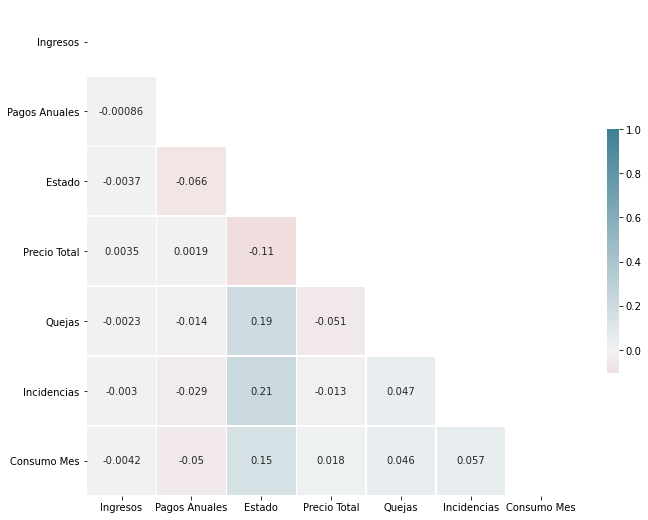

In [23]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [24]:
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43


## Benchmarks (Baseline)

- Naive Models
- Modelo sin variables categóricas

### Naive Models:

Modelo en el que una Queja implica la Baja

In [25]:
data_filtered = data[['Quejas', 'Estado']]
data_filtered.head()

,Quejas,Estado
0,1,1
1,0,1
2,1,1
3,1,0
4,0,1


In [26]:
y_pred = data_filtered['Quejas'].apply(lambda x: 1 if x > 0 else 0)
y_test = data_filtered['Estado']

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     40937
           1       0.46      0.33      0.39     14290

    accuracy                           0.73     55227
   macro avg       0.62      0.60      0.61     55227
weighted avg       0.70      0.73      0.71     55227



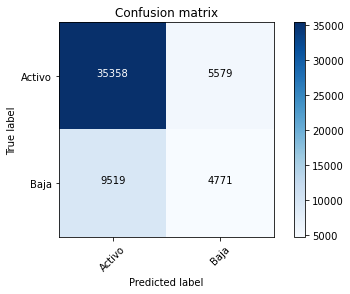

In [27]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Modelo en el que una Queja o un Incidencia implica la Baja

In [28]:
data_filtered = data[['Quejas', 'Incidencias', 'Estado']]
data_filtered.head()

,Quejas,Incidencias,Estado
0,1,0,1
1,0,0,1
2,1,0,1
3,1,0,0
4,0,8,1


In [29]:
y_pred = data_filtered['Quejas'] + data_filtered['Incidencias']
y_pred = y_pred.apply(lambda x: 1 if x > 0 else 0)
y_test = data_filtered['Estado']

              precision    recall  f1-score   support

           0       0.82      0.67      0.74     40937
           1       0.38      0.57      0.46     14290

    accuracy                           0.65     55227
   macro avg       0.60      0.62      0.60     55227
weighted avg       0.70      0.65      0.66     55227



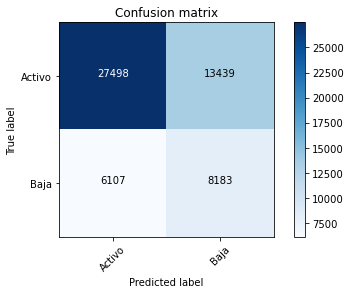

In [30]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

### Sin variables categóricas:

In [31]:
data_filtered = data[['Quejas', 'Incidencias', 'Consumo Mes', 'Estado']]
data_filtered.head()

,Quejas,Incidencias,Consumo Mes,Estado
0,1,0,441.63,1
1,0,0,152.57,1
2,1,0,288.73,1
3,1,0,103.97,0
4,0,8,145.43,1


In [32]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 3]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Regresión Logística

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      8188
           1       0.42      0.55      0.48      2858

    accuracy                           0.69     11046
   macro avg       0.62      0.64      0.63     11046
weighted avg       0.72      0.69      0.70     11046



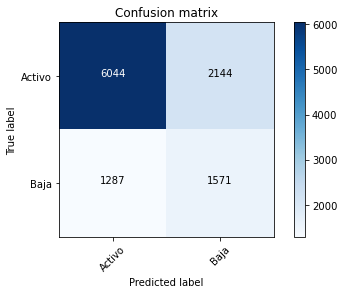

In [36]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.70


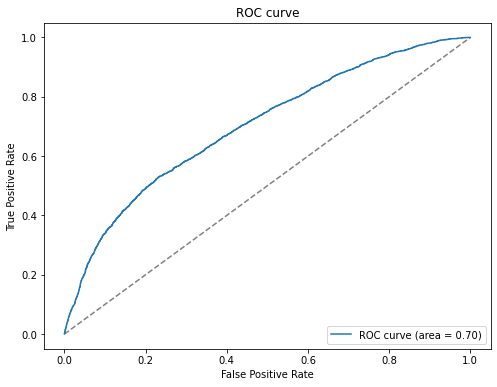

In [37]:
plot_roc_curve(classifier, X_test, y_test)

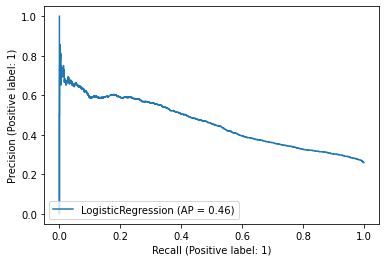

In [38]:
plot_precision_recall_curve(classifier, X_test, y_test)

## Feature engineering

- Edad en Años
- Rango de Income Amount
- Días Activo escalado
- Escalado de 'Quejas' y 'MT

Rangos de Edad:

In [39]:
data.columns

Index(['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender',
       'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado',
       'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total',
       'Quejas', 'Incidencias', 'Consumo Mes'],
      dtype='object')

In [40]:
data['Born Date'].isnull().sum()

226

In [41]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43


In [42]:
data['Born Date'].isnull().sum()

0

In [44]:
# Edad en el momento del alta

data['Edad'] = ((data['Fecha Alta'] - data['Born Date']).dt.days)/365
                        
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356


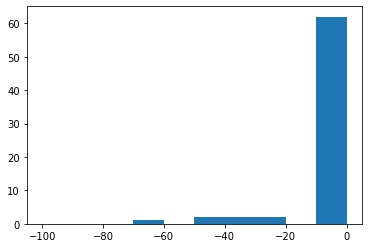

In [45]:
plt.hist(data['Edad'], range = (-100,0));

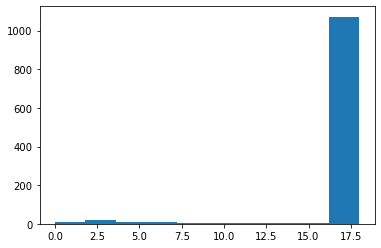

In [46]:
plt.hist(data['Edad'], range = (0,18));

In [47]:
edad_mean = data['Edad'].mean()
edad_mean

49.411166614701536

In [48]:
data['Edad'] = data['Edad'].apply(lambda x: edad_mean if x<18 else x)

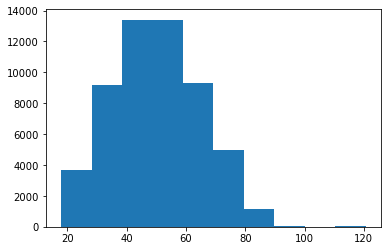

In [49]:
plt.hist(data['Edad']);

In [50]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30


In [51]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,0,1,All,0,1
Rango_Edad,,,,,
+80,961,203,1164,0.825601,0.174399
18-30,2584,2258,4842,0.533664,0.466336
30-40,6163,3749,9912,0.621772,0.378228
40-50,10346,3941,14287,0.724155,0.275845
50-60,9324,2274,11598,0.803932,0.196068
60-70,7571,1276,8847,0.855770,0.144230
70-80,3988,589,4577,0.871313,0.128687
All,40937,14290,55227,0.741250,0.258750


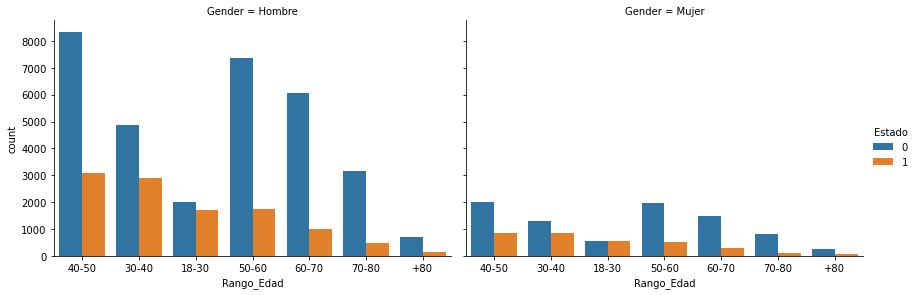

In [52]:
g = sns.catplot(x="Rango_Edad", col="Gender",
                data=data, kind="count", hue = "Estado",
                height=4, aspect=1.5);

Rangos de Ingresos:

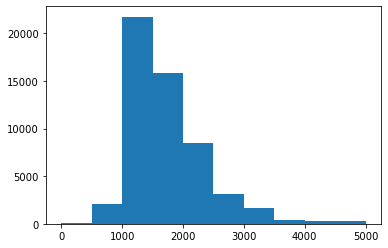

In [53]:
plt.hist(data['Ingresos'], range=(0, 5000));

In [54]:
data.loc[data['Ingresos'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Ingresos'] > 1000) & (data['Ingresos'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Ingresos'] > 1500) & (data['Ingresos'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Ingresos'] > 2000) & (data['Ingresos'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Ingresos'] > 3000, 'Income'] = "+3000"
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000


In [55]:
tab1 = pd.crosstab(data["Income"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,0,1,All,0,1
Income,,,,,
+3000,1687,448,2135,0.790164,0.209836
0-1000,6979,3147,10126,0.689216,0.310784
1000-1500,18436,6408,24844,0.742071,0.257929
1500-2000,9482,3084,12566,0.754576,0.245424
2000-3000,4353,1203,5556,0.783477,0.216523
All,40937,14290,55227,0.741250,0.258750


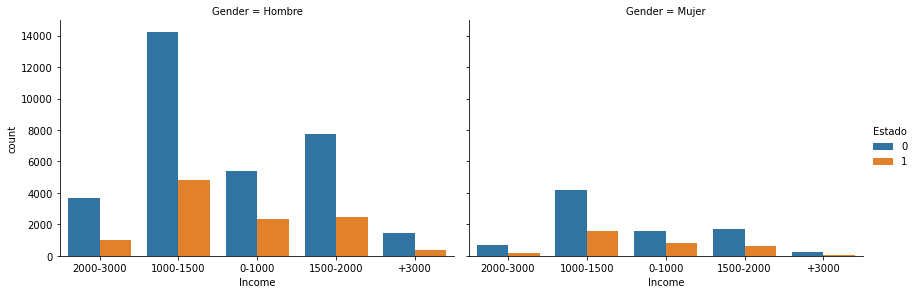

In [56]:
g = sns.catplot(x="Income", col="Gender",
                data=data, kind="count", hue = "Estado",
                height=4, aspect=1.5);

Días Activo:

In [57]:
# Días hasta el 19/01/2021 si ACTIVO y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Fecha Alta'])):
    if data.loc[i, 'Estado'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Fecha Alta']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Fecha Estado'] - data.loc[i,'Fecha Alta']).days
                        
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income,Dias_Activo
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000,987
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500,1093
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000,1150
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500,2575
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000,1165


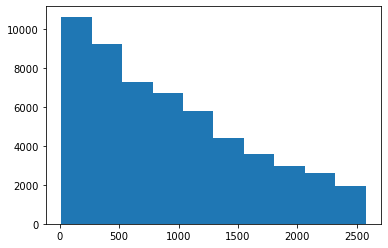

In [58]:
plt.hist(data['Dias_Activo']);

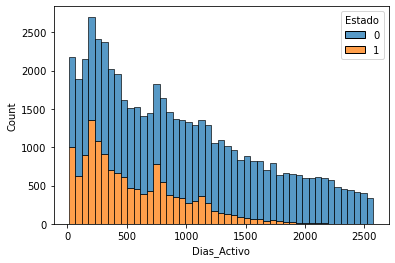

In [59]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Estado', multiple = 'stack')

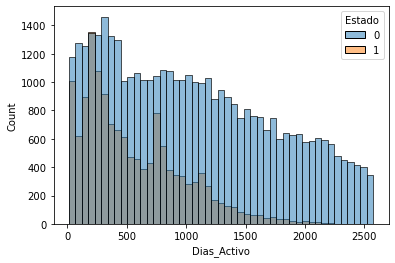

In [60]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Estado', multiple = 'layer');

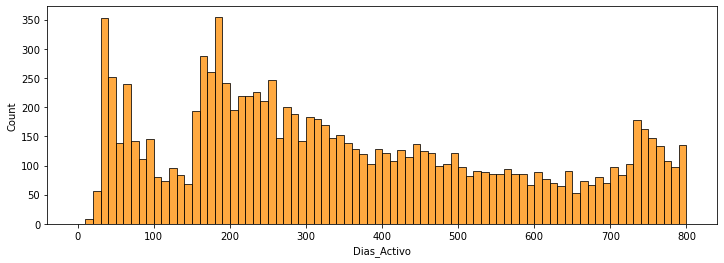

In [61]:
fig, ax = plt.subplots(figsize = (12, 4))
sns.histplot(data = data[data['Estado']==1], x = 'Dias_Activo',
             binrange = (0,800), binwidth=10, color='darkorange');

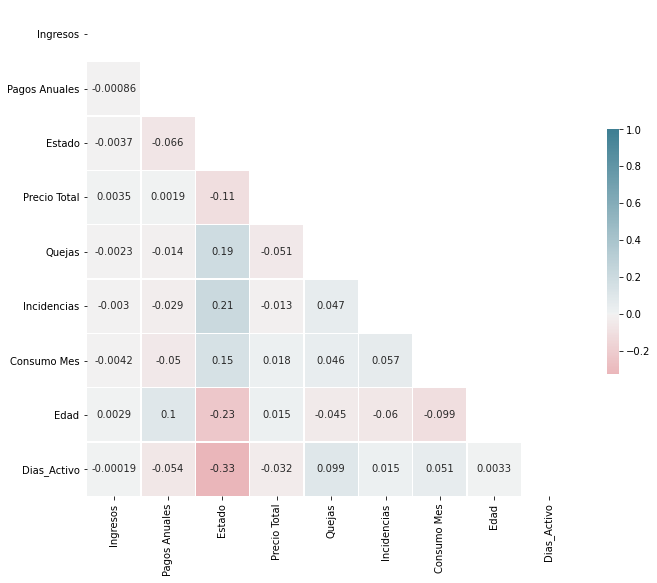

In [62]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Dias_Activo_sca'] = scaler.fit_transform(data['Dias_Activo'].values.reshape(-1, 1))
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000,987,0.380172
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500,1093,0.421546
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000,1150,0.443794
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500,2575,1.000000
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000,1165,0.449649


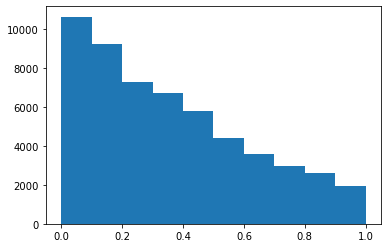

In [64]:
plt.hist(data['Dias_Activo_sca']);

Escalado de Quejas e Incidencias:

In [65]:
scaler = MinMaxScaler()
data['Quejas_sca'] = scaler.fit_transform(data['Quejas'].values.reshape(-1, 1))
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000,987,0.380172,0.035714
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500,1093,0.421546,0.000000
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000,1150,0.443794,0.035714
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500,2575,1.000000,0.035714
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000,1165,0.449649,0.000000


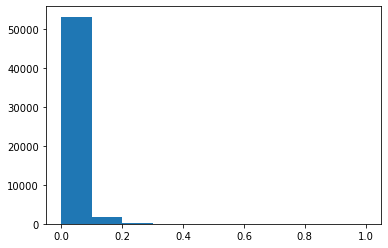

In [66]:
plt.hist(data['Quejas_sca']);

In [67]:
scaler = MinMaxScaler()
data['Incidencias_sca'] = scaler.fit_transform(data['Incidencias'].values.reshape(-1, 1))
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca,Incidencias_sca
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000,987,0.380172,0.035714,0.000000
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500,1093,0.421546,0.000000,0.000000
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000,1150,0.443794,0.035714,0.000000
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500,2575,1.000000,0.035714,0.000000
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000,1165,0.449649,0.000000,0.470588


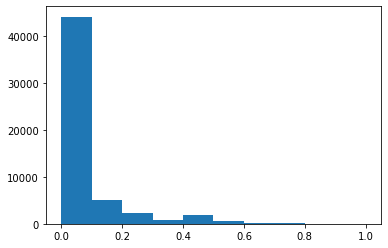

In [68]:
plt.hist(data['Incidencias_sca']);

Escalado de Consumo Mes:

In [69]:
scaler = MinMaxScaler()
data['Consumo_sca'] = scaler.fit_transform(data['Consumo Mes'].values.reshape(-1, 1))
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca,Incidencias_sca,Consumo_sca
0,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63,40.649315,40-50,2000-3000,987,0.380172,0.035714,0.000000,0.385207
1,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57,37.676712,30-40,1000-1500,1093,0.421546,0.000000,0.000000,0.133043
2,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73,31.821918,30-40,0-1000,1150,0.443794,0.035714,0.000000,0.251823
3,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97,37.939726,30-40,1000-1500,2575,1.000000,0.035714,0.000000,0.090647
4,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43,24.438356,18-30,0-1000,1165,0.449649,0.000000,0.470588,0.126815


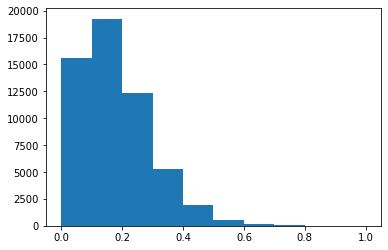

In [70]:
plt.hist(data['Consumo_sca']);

## Enconding con ``get_dummies``

In [71]:
data.columns

Index(['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender',
       'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado',
       'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total',
       'Quejas', 'Incidencias', 'Consumo Mes', 'Edad', 'Rango_Edad', 'Income',
       'Dias_Activo', 'Dias_Activo_sca', 'Quejas_sca', 'Incidencias_sca',
       'Consumo_sca'],
      dtype='object')

In [72]:
data_filtered = data[['Gender', 'Tipo Inmueble', 'Tipo Propiedad', 'Situacion Laboral', 'Estado Civil', 
                      'Provincia', 'Pais', 'Rango_Edad', 'Income', 'Precio Contado', 'Pagos Anuales', 'Precio Total',
                      'Quejas_sca', 'Incidencias_sca', 'Consumo_sca', 'Estado']]
data_filtered.columns

Index(['Gender', 'Tipo Inmueble', 'Tipo Propiedad', 'Situacion Laboral',
       'Estado Civil', 'Provincia', 'Pais', 'Rango_Edad', 'Income',
       'Precio Contado', 'Pagos Anuales', 'Precio Total', 'Quejas_sca',
       'Incidencias_sca', 'Consumo_sca', 'Estado'],
      dtype='object')

In [73]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Tipo Inmueble'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Situacion Laboral'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Estado Civil'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Pais'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")
Precio = pd.get_dummies(data = data_filtered['Precio Contado'],prefix = 'Rango_Precio')
Tipo = pd.get_dummies(data = data_filtered['Tipo Propiedad'],prefix = "Tipo")
N_Pay = pd.get_dummies(data = data_filtered['Pagos Anuales'],prefix = "N_Pay")
Precio_Total = pd.get_dummies(data = data_filtered['Precio Total'],prefix = "Precio_Total")

In [74]:
data_filtered.drop(['Gender','Tipo Inmueble','Situacion Laboral','Provincia', 'Tipo Propiedad', 'Pagos Anuales',
                    'Pais', 'Estado Civil', 'Rango_Edad', 'Precio Contado', 'Income', 'Precio Total'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad,Income,
                      Precio,Tipo,N_Pay, Precio_Total],axis=1)
dummy_df.columns

Index(['Quejas_sca', 'Incidencias_sca', 'Consumo_sca', 'Estado',
       'Gender_Hombre', 'Gender_Mujer', 'House_Bar', 'House_Casa',
       'House_Chalet', 'House_Nave', 'House_Oficina', 'House_Piso',
       'House_Tienda', 'Labor_Autonomo', 'Labor_Jubilado', 'Labor_Parado',
       'Labor_Pensionista', 'Labor_Trabajo Fijo', 'Labor_Trabajo Temporal',
       'Marital_Casado', 'Marital_Divorciado', 'Marital_Soltero',
       'Marital_Viudo', 'Provincia_Alicante', 'Provincia_Castellon',
       'Provincia_Valencia', 'Nationality_Africa', 'Nationality_Asia',
       'Nationality_Centro/Sur America', 'Nationality_España',
       'Nationality_Europa', 'Nationality_Norteamerica', 'Nationality_Oceania',
       'Nationality_Otros', 'Nationality_Union Europea', 'Rango_Edad_+80',
       'Rango_Edad_18-30', 'Rango_Edad_30-40', 'Rango_Edad_40-50',
       'Rango_Edad_50-60', 'Rango_Edad_60-70', 'Rango_Edad_70-80',
       'Income_+3000', 'Income_0-1000', 'Income_1000-1500', 'Income_1500-2000',
       'Inc

In [76]:
dummy_df.head()

,Quejas_sca,Incidencias_sca,Consumo_sca,Estado,Gender_Hombre,Gender_Mujer,House_Bar,House_Casa,House_Chalet,House_Nave,House_Oficina,House_Piso,House_Tienda,Labor_Autonomo,Labor_Jubilado,Labor_Parado,Labor_Pensionista,Labor_Trabajo Fijo,Labor_Trabajo Temporal,Marital_Casado,Marital_Divorciado,Marital_Soltero,Marital_Viudo,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_Africa,Nationality_Asia,Nationality_Centro/Sur America,Nationality_España,Nationality_Europa,Nationality_Norteamerica,Nationality_Oceania,Nationality_Otros,Nationality_Union Europea,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000,Rango_Precio_0 - 100 EUR,Rango_Precio_100 - 200 EUR,Rango_Precio_200 - 300 EUR,Rango_Precio_300 - 400 EUR,Rango_Precio_Mas de 500 EUR,Rango_Precio_Promo 0 EUR,Tipo_Alquiler,Tipo_Empresa,Tipo_Familiar,Tipo_Propiedad Parcial,Tipo_Propiedad Total,N_Pay_12,N_Pay_13,N_Pay_14,N_Pay_15,N_Pay_16,Precio_Total_199,Precio_Total_299,Precio_Total_399,Precio_Total_499,Precio_Total_599,Precio_Total_699,Precio_Total_799,Precio_Total_899,Precio_Total_999,Precio_Total_1099,Precio_Total_1199
0,0.035714,0.000000,0.385207,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.133043,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.035714,0.000000,0.251823,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.035714,0.000000,0.090647,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.000000,0.470588,0.126815,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [77]:
X = dummy_df.drop(['Estado'],axis=1).values
y = dummy_df['Estado'].values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

Logistic Accuracy is 0.74
Cross Validation Score = 0.73
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      8188
           1       0.50      0.70      0.58      2858

    accuracy                           0.74     11046
   macro avg       0.69      0.72      0.69     11046
weighted avg       0.78      0.74      0.75     11046



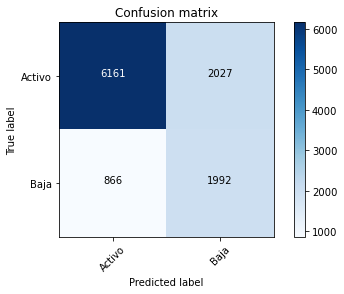

In [79]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X_test, y_test, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.80


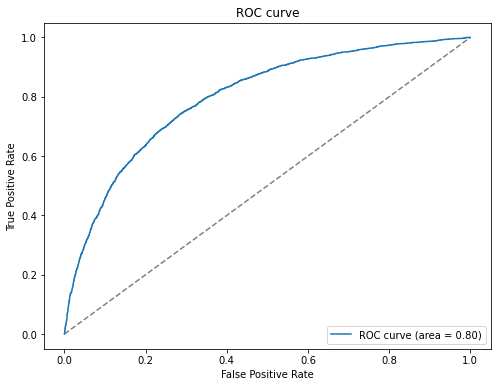

In [80]:
plot_roc_curve(LR, X_test, y_test)

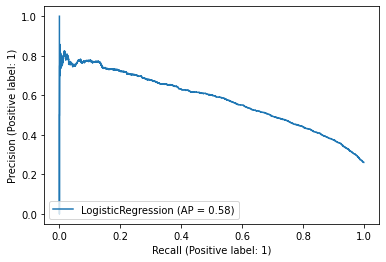

In [81]:
plot_precision_recall_curve(LR, X_test, y_test);

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# Don´t do this!!!

skf = StratifiedKFold(n_splits=5)
knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,17,2)},
                      scoring = 'recall', cv = skf)

knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
             scoring='recall')

In [81]:
knn.best_params_

{'n_neighbors': 3}

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      8188
           1       0.52      0.34      0.41      2858

    accuracy                           0.75     11046
   macro avg       0.66      0.61      0.62     11046
weighted avg       0.72      0.75      0.73     11046



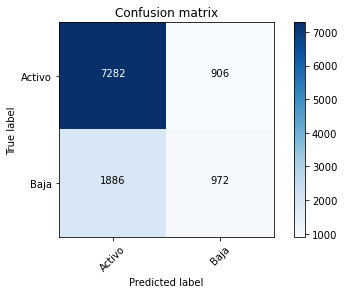

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.67


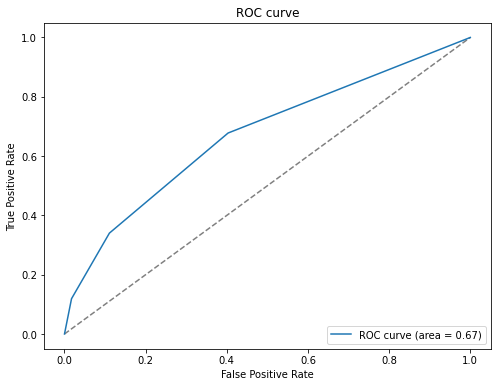

In [86]:
plot_roc_curve(knn, X_test, y_test)

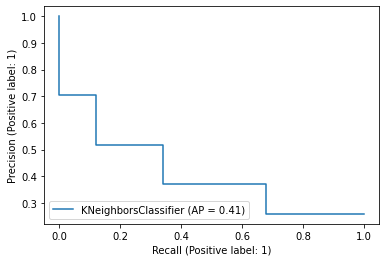

In [87]:
plot_precision_recall_curve(knn, X_test, y_test);

### Decission Tree Classifier

Decision Tree Accuracy is 0.72
Cross Validation Score = 0.69
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      8188
           1       0.47      0.71      0.57      2858

    accuracy                           0.72     11046
   macro avg       0.67      0.72      0.68     11046
weighted avg       0.77      0.72      0.73     11046



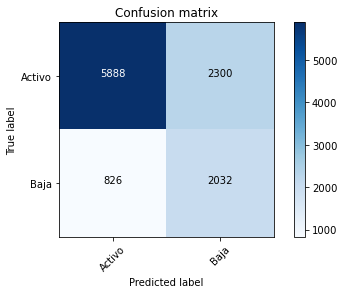

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_DT = cross_val_score(DT, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.78


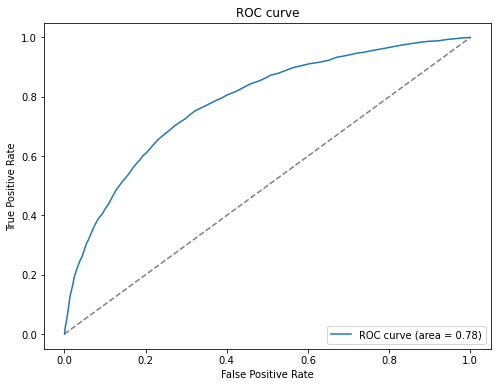

In [89]:
plot_roc_curve(DT, X_test, y_test)

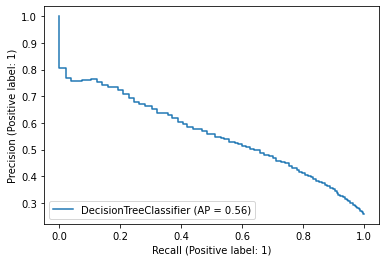

In [90]:
plot_precision_recall_curve(DT, X_test, y_test);

### Random Forest Classifier

Random Forest Accuracy is 0.79
Cross Validation Score = 0.78
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8188
           1       0.59      0.62      0.60      2858

    accuracy                           0.79     11046
   macro avg       0.73      0.73      0.73     11046
weighted avg       0.79      0.79      0.79     11046



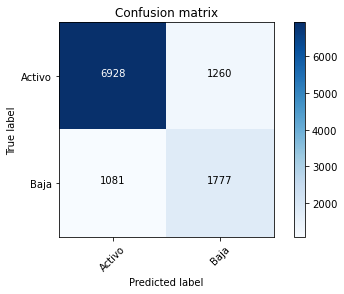

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.81


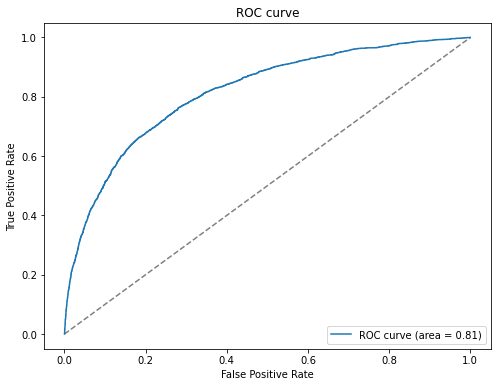

In [92]:
plot_roc_curve(rfc, X_test, y_test)

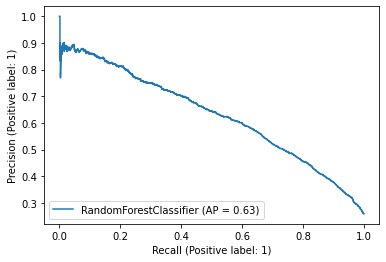

In [93]:
plot_precision_recall_curve(rfc, X_test, y_test);

### XGBoost

GradientBoost Accuracy= 0.80
Cross Validation Score = 0.80
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      8188
           1       0.70      0.43      0.53      2858

    accuracy                           0.80     11046
   macro avg       0.76      0.68      0.70     11046
weighted avg       0.79      0.80      0.79     11046



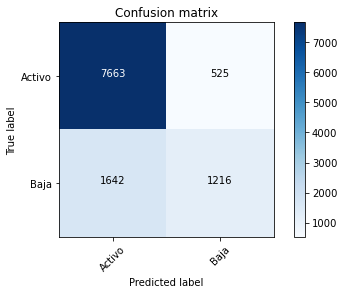

In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, booster='gbtree', learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_xgb = cross_val_score(xgb, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.82


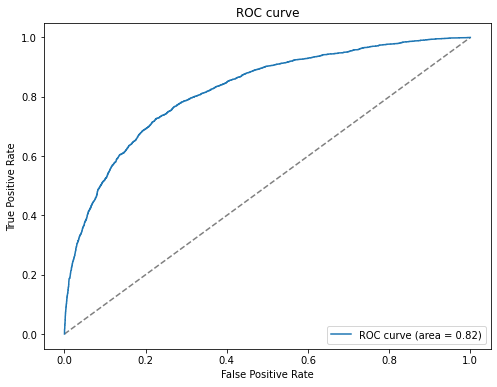

In [95]:
plot_roc_curve(xgb, X_test, y_test)

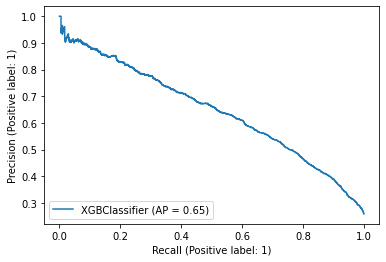

In [96]:
plot_precision_recall_curve(xgb, X_test, y_test);

### Comparing ROC Curves

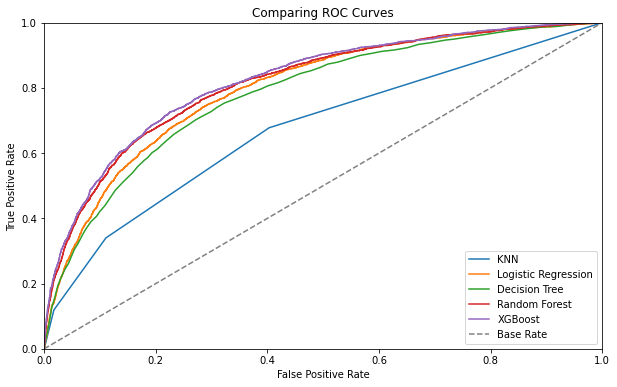

In [97]:
plt.figure(figsize = (10,6), linewidth= 1)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

plt.plot([0,1],[0,1],label='Base Rate', ls = '--', c = 'grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Comparing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Comparing PR Curves

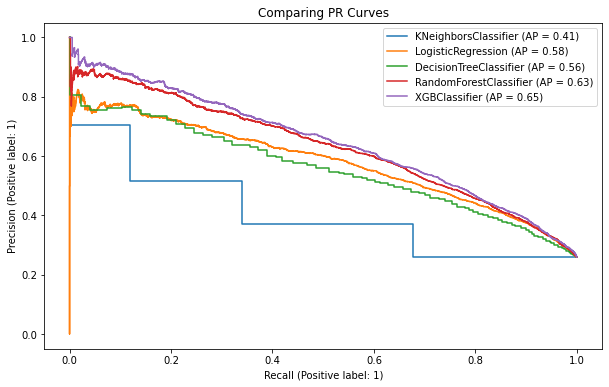

In [98]:
models = [knn, LR, DT, rfc, xgb]

fig, ax = plt.subplots(figsize=(10, 6))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=ax)
    plt.legend(loc="upper right")
ax.set_title("Comparing PR Curves");

### Feature importances

In [99]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression(max_iter=1000, class_weight="balanced")
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ 1,  1,  1, 65, 67,  4, 20, 21, 43, 66, 44,  2, 45, 40,  1,  8, 35,
        7, 25, 12, 69, 49, 59, 34, 61, 15, 31, 17, 38, 63,  3, 33, 11, 48,
       29,  6,  9, 50, 30, 19, 18, 46, 39, 68, 58, 47, 24, 64, 37, 52, 28,
       23,  5, 32, 10, 57, 56, 42, 60, 41, 62, 51, 36, 13, 14, 22, 55, 53,
       26,  1, 16, 54, 27])

[7.06421926e-02 8.37267128e-02 1.77014539e-01 1.76418034e-02
 1.76205362e-02 1.30180971e-02 1.75704728e-02 1.25055644e-02
 8.07585898e-03 5.65245864e-03 1.66618742e-02 2.23944275e-02
 1.56092176e-02 8.48687702e-03 3.88604237e-03 2.58633057e-03
 1.25208781e-02 1.78834226e-03 1.32232381e-02 5.93014268e-03
 1.30593842e-02 4.21026628e-03 1.89382576e-02 1.40066031e-02
 1.96015898e-02 1.19057674e-03 1.70718760e-03 3.07938136e-03
 1.41451715e-02 2.88707889e-03 1.88159167e-04 1.56549585e-04
 3.70172536e-03 1.18530808e-02 2.84306178e-03 1.55052299e-02
 1.67164465e-02 1.50059002e-02 1.37598191e-02 1.06430972e-02
 5.93358847e-03 7.78591795e-03 1.81719536e-02 2.54252088e-02
 2.14429785e-02 1.37406620e-02 1.28018795e-02 1.02759087e-02
 7.33199462e-03 4.73431216e-03 2.79277033e-03 1.36487171e-02
 1.35600482e-02 2.31715713e-03 2.00998144e-03 1.16919608e-02
 1.51339151e-02 2.13528346e-02 5.53557688e-03 2.13890041e-02
 4.06365164e-03 2.77358607e-03 9.53535648e-04 2.39772989e-03
 1.47067978e-02 1.154190

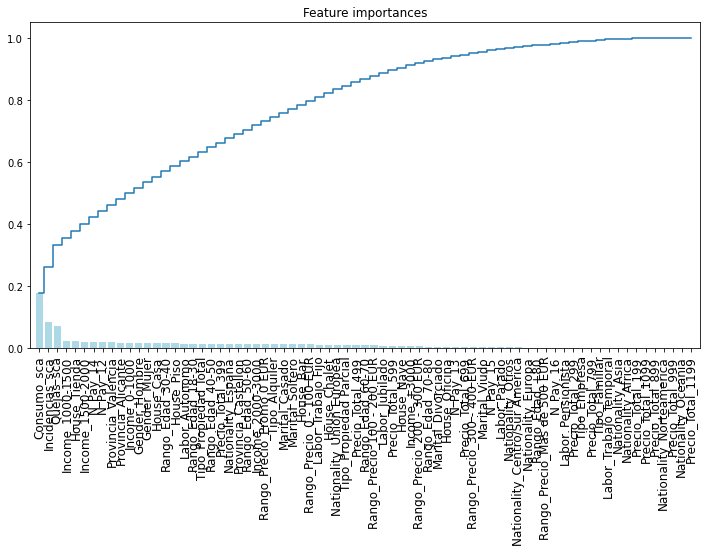

In [100]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Estado'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()